<a href="https://colab.research.google.com/github/amarsinghen/santander-product-recommendation/blob/master/Santander_Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [3]:
!nvidia-smi
tf.config.experimental.list_physical_devices()

Sun Mar 22 22:50:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [0]:
import zipfile
files = ['train_ver2.csv.zip', 'test_ver2.csv.zip']
for file in files:
  local_zip = '/content/drive/My Drive/datasets/santander-product-recommendation/' + file
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('/tmp')
  zip_ref.close()

In [0]:
# !cp sample_data '/content/drive/My Drive/datasets/santander-product-recommendation/'

In [7]:
!head -10 '/tmp/train_ver2.csv'

"fecha_dato","ncodpers","ind_empleado","pais_residencia","sexo","age","fecha_alta","ind_nuevo","antiguedad","indrel","ult_fec_cli_1t","indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","renta","segmento","ind_ahor_fin_ult1","ind_aval_fin_ult1","ind_cco_fin_ult1","ind_cder_fin_ult1","ind_cno_fin_ult1","ind_ctju_fin_ult1","ind_ctma_fin_ult1","ind_ctop_fin_ult1","ind_ctpp_fin_ult1","ind_deco_fin_ult1","ind_deme_fin_ult1","ind_dela_fin_ult1","ind_ecue_fin_ult1","ind_fond_fin_ult1","ind_hip_fin_ult1","ind_plan_fin_ult1","ind_pres_fin_ult1","ind_reca_fin_ult1","ind_tjcr_fin_ult1","ind_valo_fin_ult1","ind_viv_fin_ult1","ind_nomina_ult1","ind_nom_pens_ult1","ind_recibo_ult1"
2015-01-28,1375586,N,ES,H, 35,2015-01-12, 0,      6, 1,,1.0,A,S,N,,KHL,N, 1,29,"MALAGA", 1,87218.1,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0
2015-01-28,1050611,N,ES,V, 23,2012-08-10, 0,     35, 1,,1,I,S,S,,KHE,

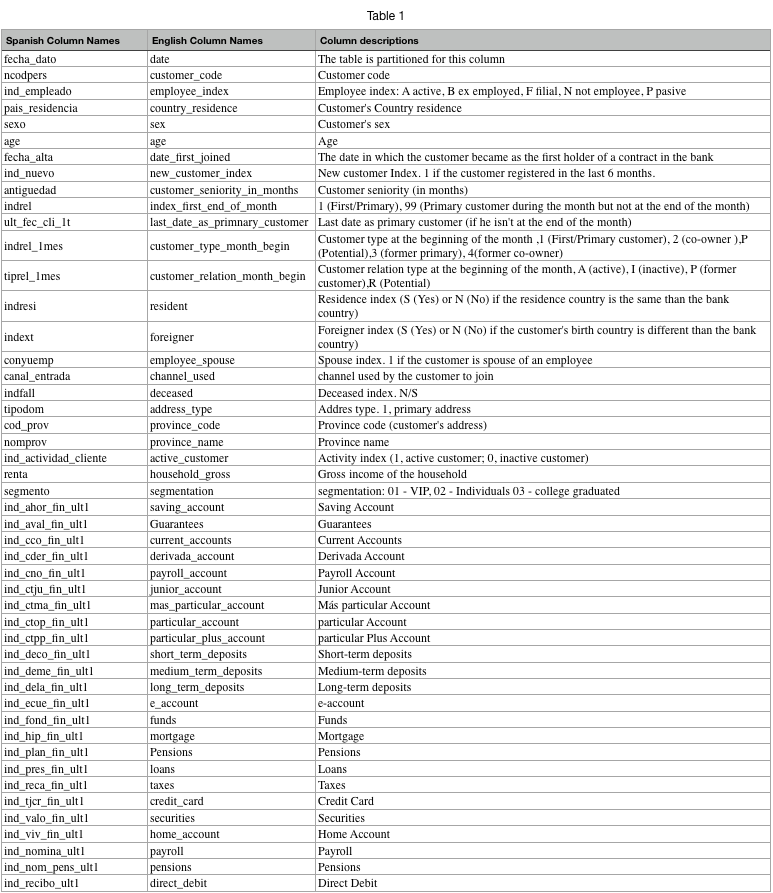

In [8]:
import pandas as pd
spr_train_df = pd.read_csv('/tmp/train_ver2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
spr_test_df = pd.read_csv('/tmp/test_ver2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Column Names


In [10]:
spr_train_df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [0]:
spr_train_df.columns = ['date','customer_code','employee_index','country_residence','sex','age','date_first_joined','new_customer_index','customer_seniority_in_months','index_first_end_of_month','last_date_as_primary_customer','customer_type_month_begin','customer_relation_month_begin','resident','foreigner','employee_spouse','channel_used','deceased','address_type','province_code','province_name','active_customer','household_gross','segmentation','saving_account','guarantees','current_accounts','derivada_account','payroll_account','junior_account','mas_particular_account','particular_account','particular_plus_account','short_term_deposits','medium_term_deposits','long_term_deposits','e_account','funds','mortgage','pensions_1','loans','taxes','credit_card','securities','home_account','payroll','pensions_2','direct_debit']

In [12]:
spr_train_df.columns

Index(['date', 'customer_code', 'employee_index', 'country_residence', 'sex',
       'age', 'date_first_joined', 'new_customer_index',
       'customer_seniority_in_months', 'index_first_end_of_month',
       'last_date_as_primary_customer', 'customer_type_month_begin',
       'customer_relation_month_begin', 'resident', 'foreigner',
       'employee_spouse', 'channel_used', 'deceased', 'address_type',
       'province_code', 'province_name', 'active_customer', 'household_gross',
       'segmentation', 'saving_account', 'guarantees', 'current_accounts',
       'derivada_account', 'payroll_account', 'junior_account',
       'mas_particular_account', 'particular_account',
       'particular_plus_account', 'short_term_deposits',
       'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds',
       'mortgage', 'pensions_1', 'loans', 'taxes', 'credit_card', 'securities',
       'home_account', 'payroll', 'pensions_2', 'direct_debit'],
      dtype='object')

In [13]:
spr_test_df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

In [0]:
spr_test_df.columns = ['date','customer_code','employee_index','country_residence','sex','age','date_first_joined','new_customer_index','customer_seniority_in_months','index_first_end_of_month','last_date_as_primary_customer','customer_type_month_begin','customer_relation_month_begin','resident','foreigner','employee_spouse','channel_used','deceased','address_type','province_code','province_name','active_customer','household_gross','segmentation']

In [15]:
spr_test_df.columns

Index(['date', 'customer_code', 'employee_index', 'country_residence', 'sex',
       'age', 'date_first_joined', 'new_customer_index',
       'customer_seniority_in_months', 'index_first_end_of_month',
       'last_date_as_primary_customer', 'customer_type_month_begin',
       'customer_relation_month_begin', 'resident', 'foreigner',
       'employee_spouse', 'channel_used', 'deceased', 'address_type',
       'province_code', 'province_name', 'active_customer', 'household_gross',
       'segmentation'],
      dtype='object')

### Sample DF Data

In [16]:
spr_train_df[:5]

,date,customer_code,employee_index,country_residence,sex,age,date_first_joined,new_customer_index,customer_seniority_in_months,index_first_end_of_month,last_date_as_primary_customer,customer_type_month_begin,customer_relation_month_begin,resident,foreigner,employee_spouse,channel_used,deceased,address_type,province_code,province_name,active_customer,household_gross,segmentation,saving_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_1,loans,taxes,credit_card,securities,home_account,payroll,pensions_2,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [17]:
spr_test_df[:5]

,date,customer_code,employee_index,country_residence,sex,age,date_first_joined,new_customer_index,customer_seniority_in_months,index_first_end_of_month,last_date_as_primary_customer,customer_type_month_begin,customer_relation_month_begin,resident,foreigner,employee_spouse,channel_used,deceased,address_type,province_code,province_name,active_customer,household_gross,segmentation
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaN,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,NaN,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [0]:
from pandas_profiling import ProfileReport

### TRAIN DF PROFILE

In [19]:
ProfileReport(spr_train_df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,48
Number of observations,13647309
Total Missing (%),4.8%
Total size in memory,4.9 GiB
Average record size in memory,384.0 B
Numeric,7
Categorical,16
Boolean,23
Date,0
Text (Unique),0
Rejected,1


### TEST DF PROFILE

In [20]:
ProfileReport(spr_test_df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,24
Number of observations,929615
Total Missing (%),8.4%
Total size in memory,170.2 MiB
Average record size in memory,192.0 B
Numeric,5
Categorical,14
Boolean,3
Date,0
Text (Unique),0
Rejected,2


### Creating New Dataframes for Data Processing

In [0]:
spr_train_processed_df = spr_train_df

In [22]:
spr_train_processed_df[:2]

,date,customer_code,employee_index,country_residence,sex,age,date_first_joined,new_customer_index,customer_seniority_in_months,index_first_end_of_month,last_date_as_primary_customer,customer_type_month_begin,customer_relation_month_begin,resident,foreigner,employee_spouse,channel_used,deceased,address_type,province_code,province_name,active_customer,household_gross,segmentation,saving_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_1,loans,taxes,credit_card,securities,home_account,payroll,pensions_2,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
spr_test_processed_df = spr_test_df

In [24]:
spr_test_processed_df[:2]

,date,customer_code,employee_index,country_residence,sex,age,date_first_joined,new_customer_index,customer_seniority_in_months,index_first_end_of_month,last_date_as_primary_customer,customer_type_month_begin,customer_relation_month_begin,resident,foreigner,employee_spouse,channel_used,deceased,address_type,province_code,province_name,active_customer,household_gross,segmentation
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaN,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES


### Verifying which columns have null values

In [25]:
spr_train_processed_df.isnull().any()

date                             False
customer_code                    False
employee_index                    True
country_residence                 True
sex                               True
age                              False
date_first_joined                 True
new_customer_index                True
customer_seniority_in_months     False
index_first_end_of_month          True
last_date_as_primary_customer     True
customer_type_month_begin         True
customer_relation_month_begin     True
resident                          True
foreigner                         True
employee_spouse                   True
channel_used                      True
deceased                          True
address_type                      True
province_code                     True
province_name                     True
active_customer                   True
household_gross                   True
segmentation                      True
saving_account                   False
guarantees               

In [26]:
spr_train_processed_df.isnull().sum()

date                                    0
customer_code                           0
employee_index                      27734
country_residence                   27734
sex                                 27804
age                                     0
date_first_joined                   27734
new_customer_index                  27734
customer_seniority_in_months            0
index_first_end_of_month            27734
last_date_as_primary_customer    13622516
customer_type_month_begin          149781
customer_relation_month_begin      149781
resident                            27734
foreigner                           27734
employee_spouse                  13645501
channel_used                       186126
deceased                            27734
address_type                        27735
province_code                       93591
province_name                       93591
active_customer                     27734
household_gross                   2794375
segmentation                      

## Column by column cleaning up the data

### ["employee_index", "index_first_end_of_month","address_type"]
Replacing null values to max value in each column type

In [0]:
max_columns = ["employee_index", "index_first_end_of_month", "address_type"]

In [0]:
for column_name in max_columns:
  # Finding the value with maximum occurance in the column
  value = spr_test_processed_df[column_name].value_counts().idxmax()
  spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(),column_name] = value

### 4. country_residence column - Assigning missing to UK = unknown

In [29]:
spr_train_processed_df["country_residence"].unique()

array(['ES', nan, 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE',
       'DO', 'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO',
       'HN', 'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR',
       'NI', 'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU',
       'GT', 'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET',
       'CM', 'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE',
       'SG', 'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK',
       'UY', 'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR',
       'GH', 'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN',
       'GW', 'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF',
       'GM', 'KZ', 'CD', 'BZ', 'ZW', 'DJ', 'JM', 'BM', 'MT'], dtype=object)

In [30]:
spr_train_processed_df.loc[spr_train_processed_df["country_residence"]=='UK',"country_residence"]

Series([], Name: country_residence, dtype: object)

In [0]:
spr_train_processed_df.loc[spr_train_processed_df["country_residence"].isnull(),"country_residence"] = 'UK'

### ["sex","customer_relation_month_begin","resident","foreigner","deceased"] columns
Assinging missing values to "U"

In [0]:
u_columns = ["sex","customer_relation_month_begin","resident","foreigner","deceased"]

In [0]:
for column_name in u_columns:
  spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(),column_name] = "U"

### 7. date_first_joined column - Replacing all missing values to the min() of 'date' column

In [0]:
spr_train_processed_df.loc[spr_train_processed_df['date_first_joined'].isnull(), 'date_first_joined'] = spr_train_processed_df.date.min()

### 8. new_customer_index column - Calculating missing values based on the customer_seniority_in_months column

In [0]:
spr_train_processed_df.loc[spr_train_processed_df.new_customer_index.isnull() & spr_train_processed_df.customer_seniority_in_months<6,"new_customer_index"]=1

### 12. customer_type_month_begin column - Assigning missing values to 5=unknown

In [0]:
spr_train_processed_df.loc[spr_train_processed_df['customer_type_month_begin'].isnull(), "customer_type_month_begin"] = 5

###  channel_used, province_name columns - Replaced null values with "UNK"

In [0]:
unk_columns = ["channel_used","province_name"]

In [0]:
for column_name in unk_columns:
  spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(), column_name] = "UNK"

### 20. province_code column - Replace null with zeros

In [0]:
spr_train_processed_df.fillna({'province_code':0}, inplace=True)

### 22. active_customer column - Missing values give indication of inactive customers, so assinging them to 0-inactive

In [0]:
spr_train_processed_df.loc[spr_train_processed_df['active_customer'].isnull(),'active_customer'] = 0

### 23. household_gross column - Replacing with median income

In [0]:
median_income = spr_train_processed_df['household_gross'].median()
spr_train_processed_df.loc[spr_train_processed_df['household_gross'].isnull(), 'household_gross'] = median_income

### 24. segmentation column

In [0]:
spr_train_processed_df.loc[spr_train_processed_df["segmentation"].isnull(),"segmentation"] = "00 - UNKNOWN"

### 46. payroll, and 47. pensions_2 columns - Replacing missing values with values from payroll_account column since there is a very high correlation

In [0]:
replace_columns = ["payroll", "pensions_2"]

In [50]:
spr_train_processed_df.loc[spr_train_processed_df['payroll'].isnull(), 'payroll_account']

1922       0
2989       0
4646       0
5666       0
6196       0
          ..
3775976    0
3776175    0
3776230    0
3776279    0
3776332    0
Name: payroll_account, Length: 16063, dtype: int64

In [0]:
for column_name in replace_columns:
  spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(),column_name] = spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(), 'payroll_account']

### Dropping Columns last_date_as_primary_customer and employee_spouse since there are too many missing values

In [0]:
spr_train_processed_df.drop(columns = ['last_date_as_primary_customer','employee_spouse'], inplace=True)

### Verifying again if any columns have null values

In [53]:
spr_train_processed_df.isnull().sum()

date                             0
customer_code                    0
employee_index                   0
country_residence                0
sex                              0
age                              0
date_first_joined                0
new_customer_index               0
customer_seniority_in_months     0
index_first_end_of_month         0
customer_type_month_begin        0
customer_relation_month_begin    0
resident                         0
foreigner                        0
channel_used                     0
deceased                         0
address_type                     0
province_code                    0
province_name                    0
active_customer                  0
household_gross                  0
segmentation                     0
saving_account                   0
guarantees                       0
current_accounts                 0
derivada_account                 0
payroll_account                  0
junior_account                   0
mas_particular_accou

## Transforming non-numerical columns to one-hot